In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Datasets\StudentsPerformance.csv")

In [4]:
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [5]:
data.loc[data['gender'] == 'male','gender'] = 1
data.loc[data['gender'] == 'female','gender'] = 0

In [6]:
data.loc[data['test preparation course'] == 'none','test preparation course'] = 0
data.loc[data['test preparation course'] == 'completed','test preparation course'] = 1

In [7]:
print(set(data['race/ethnicity']))

{'group E', 'group D', 'group B', 'group C', 'group A'}


In [8]:
data.loc[data['lunch'] == 'free/reduced','lunch'] = 0
data.loc[data['lunch'] == 'standard','lunch'] = 1

In [9]:
data.loc[data['race/ethnicity'] == 'group A','race/ethnicity'] = 0
data.loc[data['race/ethnicity'] == 'group B','race/ethnicity'] = 1
data.loc[data['race/ethnicity'] == 'group C','race/ethnicity'] = 2
data.loc[data['race/ethnicity'] == 'group D','race/ethnicity'] = 3
data.loc[data['race/ethnicity'] == 'group E','race/ethnicity'] = 4

In [10]:
print(data)

    gender race/ethnicity parental level of education lunch  \
0        0              1           bachelor's degree     1   
1        0              2                some college     1   
2        0              1             master's degree     1   
3        1              0          associate's degree     0   
4        1              2                some college     1   
..     ...            ...                         ...   ...   
995      0              4             master's degree     1   
996      1              2                 high school     0   
997      0              2                 high school     0   
998      0              3                some college     1   
999      0              3                some college     0   

    test preparation course  math score  reading score  writing score  
0                         0          72             72             74  
1                         1          69             90             88  
2                         0

In [11]:
data['mean score'] = ((data['reading score'] + data['writing score'] + data['math score'])/3).round()

In [12]:
print(data)

    gender race/ethnicity parental level of education lunch  \
0        0              1           bachelor's degree     1   
1        0              2                some college     1   
2        0              1             master's degree     1   
3        1              0          associate's degree     0   
4        1              2                some college     1   
..     ...            ...                         ...   ...   
995      0              4             master's degree     1   
996      1              2                 high school     0   
997      0              2                 high school     0   
998      0              3                some college     1   
999      0              3                some college     0   

    test preparation course  math score  reading score  writing score  \
0                         0          72             72             74   
1                         1          69             90             88   
2                       

<Figure size 864x432 with 0 Axes>

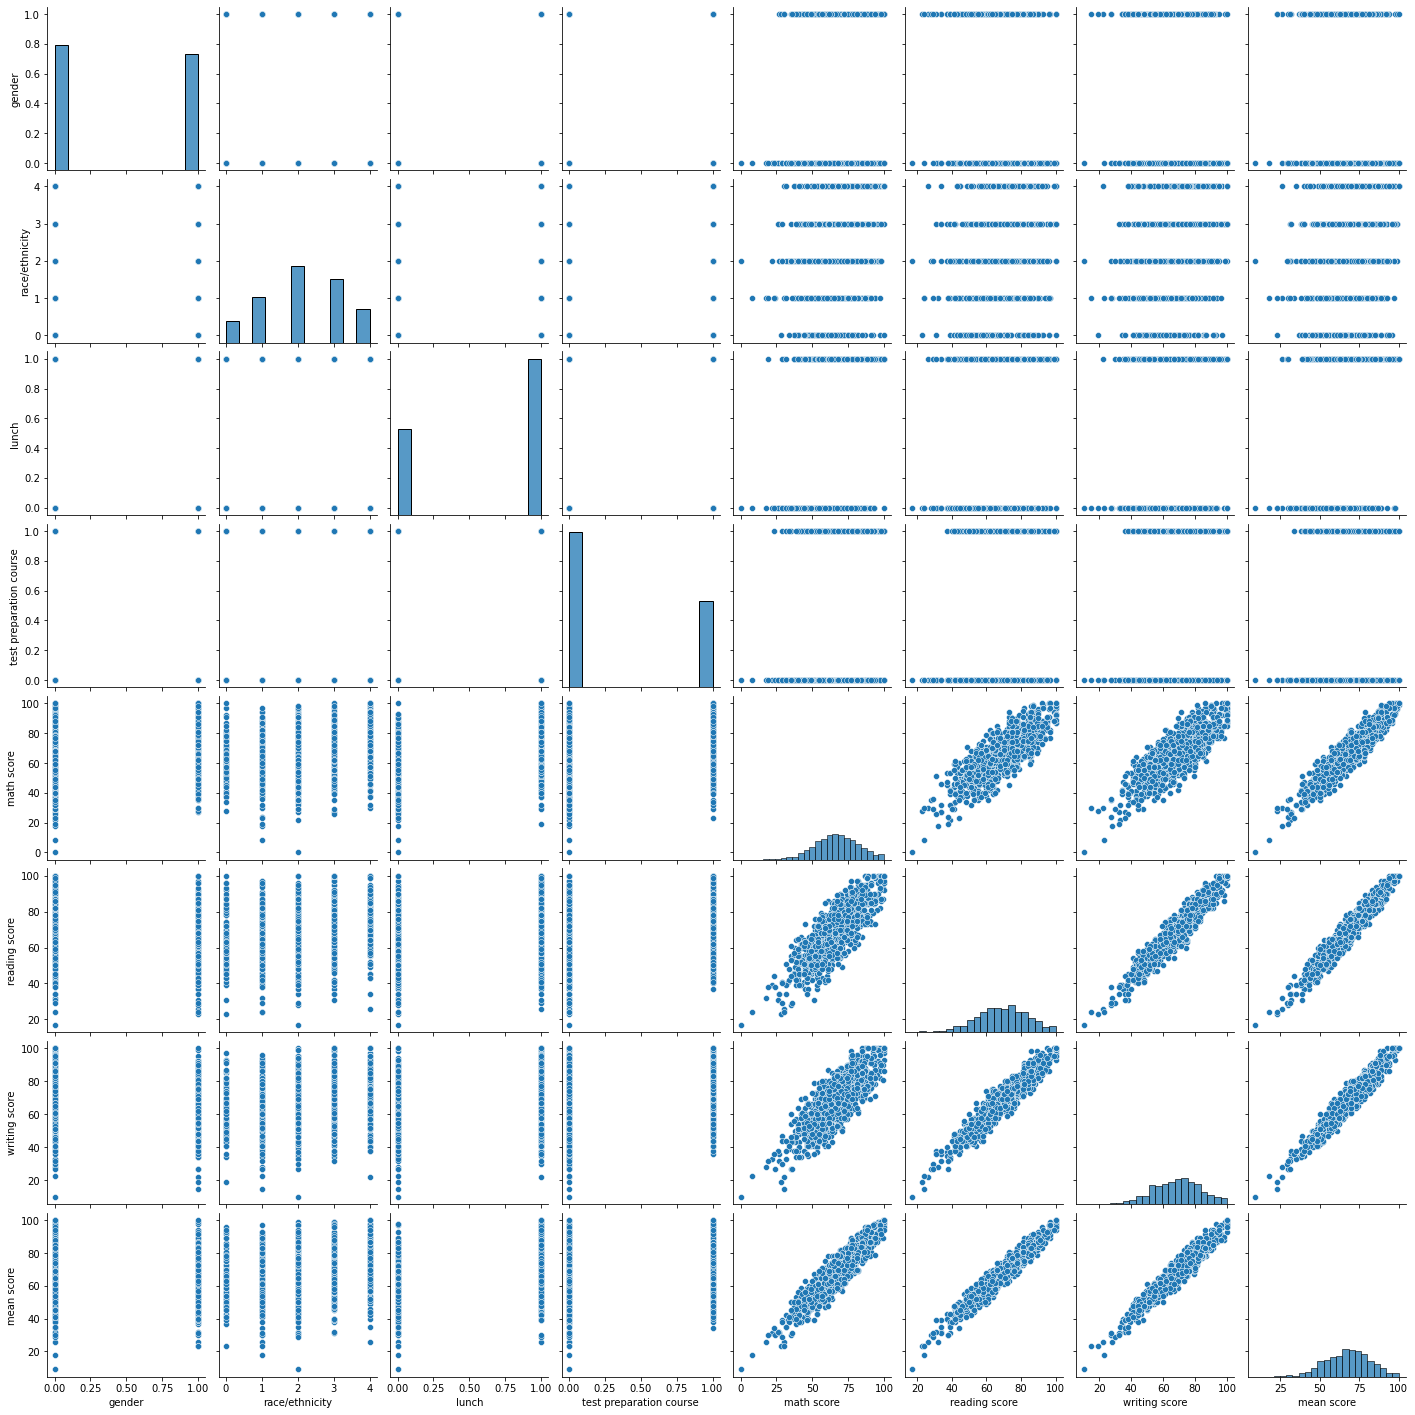

In [13]:
plt.figure(figsize = (12,6))
sns.pairplot(data)
plt.show()

<AxesSubplot:>

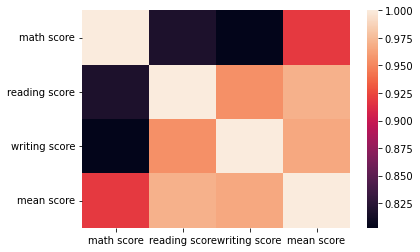

In [14]:
sns.heatmap(data.corr())

In [15]:
data.loc[data['parental level of education'] == 'some high school','parental level of education'] = 0
data.loc[data['parental level of education'] == "master's degree",'parental level of education'] = 1
data.loc[data['parental level of education'] == "associate's degree",'parental level of education'] = 2
data.loc[data['parental level of education'] == "bachelor's degree",'parental level of education'] = 3
data.loc[data['parental level of education'] == 'some college','parental level of education'] = 4
data.loc[data['parental level of education'] == 'high school','parental level of education'] = 5

In [16]:
y = data['mean score']
x = data.drop(['mean score'],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [17]:
rgr = LogisticRegression(solver = 'liblinear',random_state = 0)

In [18]:
rgr.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [19]:
y_predict = rgr.predict(x_test)

In [20]:
print(y_predict)

[69. 80. 56. 59. 73. 79. 74. 48. 76. 46. 65. 78. 73. 68. 64. 54. 59. 76.
 90. 68. 73. 70. 78. 68. 59. 69. 59. 60. 76. 75. 78. 78. 78. 67. 76. 78.
 79. 49. 74. 74. 71. 59. 62. 74. 78. 74. 79. 59. 74. 63. 52. 59. 58. 55.
 56. 69. 69. 68. 79. 69. 69. 74. 76. 68. 68. 58. 71. 72. 75. 60. 69. 80.
 69. 75. 71. 79. 69. 71. 46. 73. 75. 69. 72. 68. 74. 87. 69. 92. 76. 63.
 78. 67. 78. 59. 71. 68. 59. 63. 69. 68. 49. 80. 68. 49. 69. 78. 76. 69.
 74. 76. 76. 74. 39. 51. 74. 74. 79. 77. 78. 75. 69. 88. 83. 78. 71. 53.
 79. 76. 79. 74. 60. 69. 23. 69. 76. 70. 74. 56. 73. 69. 74. 74. 59. 71.
 79. 55. 59. 59. 89. 80. 52. 74. 74. 69. 76. 76. 51. 65. 52. 49. 79. 52.
 49. 73. 74. 73. 78. 80. 71. 71. 72. 69. 51. 75. 78. 71. 71. 60. 76. 71.
 73. 78. 78. 71. 76. 71. 92. 87. 78. 59. 55. 68. 56. 73. 59. 71. 89. 82.
 92. 68.]


In [21]:
confusion_matrix(y_test,y_predict)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
accuracy_score(y_test,y_predict)

0.02

In [78]:
classification_report(y_test,y_predict)

C:\Users\Hp\PythonAnaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\PythonAnaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\PythonAnaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\PythonAnaconda\lib\site-packages\sklearn\metr

'              precision    recall  f1-score   support\n\n        23.0       1.00      1.00      1.00         1\n        29.0       0.00      0.00      0.00         1\n        31.0       0.00      0.00      0.00         1\n        32.0       0.00      0.00      0.00         1\n        38.0       0.00      0.00      0.00         1\n        39.0       0.00      0.00      0.00         2\n        40.0       0.00      0.00      0.00         2\n        41.0       0.00      0.00      0.00         2\n        42.0       0.00      0.00      0.00         1\n        44.0       0.00      0.00      0.00         1\n        45.0       0.00      0.00      0.00         2\n        46.0       0.00      0.00      0.00         0\n        47.0       0.00      0.00      0.00         1\n        48.0       0.00      0.00      0.00         2\n        49.0       0.00      0.00      0.00         0\n        50.0       0.00      0.00      0.00         5\n        51.0       0.00      0.00      0.00         3\n       